# Sentiment analysis on movies reviews

In [ ]:
#import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaliniantil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#dataset for reviews

In [4]:
reviews = pd.read_csv('IMDB_dataset.csv')

In [5]:
movie = pd.read_csv('final_movie_dataset.csv')

In [6]:
#because of space issues we are working on only 1000 records

In [7]:
reviews.info

<bound method DataFrame.info of       Unnamed: 0                                             review sentiment
0              0  One of the other reviewers has mentioned that ...  positive
1              1  A wonderful little production. <br /><br />The...  positive
2              2  I thought this was a wonderful way to spend ti...  positive
3              3  Basically there's a family where a little boy ...  negative
4              4  Petter Mattei's "Love in the Time of Money" is...  positive
...          ...                                                ...       ...
996          996  I hated it. I hate self-aware pretentious inan...  negative
997          997  I usually try to be professional and construct...  negative
998          998  If you like me is going to see this in a film ...  negative
999          999  This is like a zoology textbook, given that it...  negative
1000        1000  This movie is awful, I can't even be bothered ...  negative

[1001 rows x 3 columns]>

In [8]:
reviews.drop('Unnamed: 0',axis=1, inplace=True)

# text preprocessing

In [9]:
reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#remove tags

In [11]:
def remove_tags(text):
    return(re.sub('<br /><br />', ' ', text).lower())

In [12]:
reviews['review'] = reviews['review'].apply(remove_tags)

In [13]:
#remove special characters

In [14]:
def remove_spl_char(text):
#     text="".join(filter(str.isalnum,text))
    text=re.sub("[^a-zA-Z0-9]", ' ', text)
    return(text)

In [15]:
reviews['review'] = reviews['review'].apply(remove_spl_char)

In [16]:
#stemming

In [17]:
from nltk.stem import PorterStemmer

In [18]:
ps = PorterStemmer()

In [19]:
def get_stem(text):
    lst = []
    for i in text.split():
        lst.append(ps.stem(i))
        
    return(" ".join(lst))

In [20]:
reviews['review'] = reviews['review'].apply(get_stem)

In [21]:
reviews['review'][0]

'one of the other review ha mention that after watch just 1 oz episod you ll be hook they are right as thi is exactli what happen with me the first thing that struck me about oz wa it brutal and unflinch scene of violenc which set in right from the word go trust me thi is not a show for the faint heart or timid thi show pull no punch with regard to drug sex or violenc it is hardcor in the classic use of the word it is call oz as that is the nicknam given to the oswald maximum secur state penitentari it focus mainli on emerald citi an experiment section of the prison where all the cell have glass front and face inward so privaci is not high on the agenda em citi is home to mani aryan muslim gangsta latino christian italian irish and more so scuffl death stare dodgi deal and shadi agreement are never far away i would say the main appeal of the show is due to the fact that it goe where other show wouldn t dare forget pretti pictur paint for mainstream audienc forget charm forget romanc oz

In [22]:
import nltk

In [23]:
# remove stopwords from the text which are not essential for prediction

In [24]:
from nltk.corpus import stopwords

In [25]:
# nltk.download('stopwords')

In [26]:
stpwords  = stopwords.words('english')

In [27]:
#convert text into vector form 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv =CountVectorizer(stop_words='english',max_features=5000,ngram_range=(1, 2))

In [30]:
X = cv.fit_transform(reviews['review']).toarray()

In [31]:
y=reviews.iloc[:,1].values

In [32]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [33]:
#train the models

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [38]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [39]:
gb.fit(X_train,y_train)
mb.fit(X_train,y_train)
bb.fit(X_train,y_train)

BernoulliNB()

In [40]:
y_pred = gb.predict(X_test)
y_pred1 = mb.predict(X_test)
y_pred2 = bb.predict(X_test)

In [41]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

0.6445182724252492
0.7906976744186046
0.7873754152823921


In [42]:
movie

,id,title,tag
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...
...,...,...,...
6472,696157,I Wanna Dance with Somebody,naomiacki ashtonsand stanleytucci drama histor...
6473,762735,Wildcat,"melissalesh drama thriller war melissa lesh, t..."
6474,661374,Glass Onion: A Knives Out Mystery,danielcraig edwardnorton janellemoná kathrynha...
6475,800815,The Pale Blue Eye,christianbal harrymel gilliananderson lucyboyn...


In [43]:
#lets fetch reviews of top 5 movies:

In [44]:
movie_review = movie.loc[:5]

In [45]:
import config

In [46]:
api_key = config.MOVIE_API_KEY
dct_comment = {'title':[],'review':[]}

for row in movie_review.iterrows():
#     get reviews using TMBD api
    title = row[1]['title']
    movie_id = row[1]['id']
    url = f'https://api.themoviedb.org/3/movie/{movie_id}/reviews?api_key={api_key}&language=en-US&page=1'
    response = requests.get(url).json()
    for result in response['results']:
        dct_comment['title'].append(title)
        dct_comment['review'].append(result['content'])
    


In [47]:
df_review = pd.DataFrame(dct_comment)

In [48]:
df_review

,title,review
0,Avatar,"Avatar is an overwhelming, immersive spectacle..."
1,Avatar,"It's cinema Jim, but not as we know it. \r\n\r..."
2,Spectre,"<a href=""http://www.cutprintfilm.com/reviews/s..."
3,Spectre,"Well, cinema’s most treasured and resilient Br..."
4,Spectre,"A ""correct"" Bond movie. All the expected stere..."
5,Spectre,"> Not your usual Bond movie, but still a good ..."
6,Spectre,FULL SPOILER-FREE REVIEW @ https://www.msbrevi...
7,The Dark Knight Rises,I felt like this was a tremendous end to Nolan...
8,The Dark Knight Rises,I personally thought this film is on par if no...
9,The Dark Knight Rises,The Dark Knight Rises is one of the best movie...


In [49]:
# Removing special characters

In [50]:
df_review['review']= df_review['review'].apply(remove_spl_char)

In [51]:
#perform stemming

In [52]:
df_review['review'] = df_review['review'].apply(get_stem)

In [53]:
X_pred = cv.transform(df_review['review']).toarray()

In [54]:
X_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
#predict sentiment behind the reviews

In [56]:
y_pred_sentiment = mb.predict(X_pred)

In [57]:
df_review['sentiment'] = y_pred_sentiment

In [58]:
df_review

,title,review,sentiment
0,Avatar,avatar is an overwhelm immers spectacl the sta...,negative
1,Avatar,It s cinema jim but not as we know it So here ...,positive
2,Spectre,a href http www cutprintfilm com review spectr...,positive
3,Spectre,well cinema s most treasur and resili british ...,positive
4,Spectre,A correct bond movi all the expect stereotyp a...,negative
5,Spectre,not your usual bond movi but still a good ente...,positive
6,Spectre,full spoiler free review http www msbreview co...,positive
7,The Dark Knight Rises,I felt like thi wa a tremend end to nolan s ba...,positive
8,The Dark Knight Rises,I person thought thi film is on par if not bet...,negative
9,The Dark Knight Rises,the dark knight rise is one of the best movi t...,positive


In [59]:
df_review['sentiment'].replace({'positive':1,'negative':0}, inplace=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

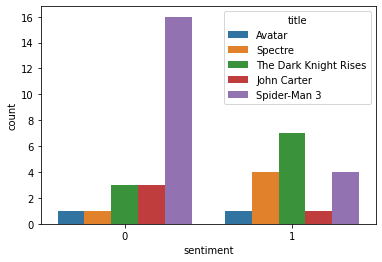

In [60]:
#bar plot for sentiments showing positive and negative sentiments for top 5 movies
plt.plot(figsize=(12,6))
sns.countplot(data=df_review, x='sentiment',hue='title')

In [61]:
# Steps involved in this notebook
# Data Collection:
#     a. get reviews data from kaggle to train the models
#     b. import movies dataset exported from other notebook on recommendations
# Data Preprocessing for get text ready for prediction
#     a. remove html tags
#     b. remove special characters using regular expression(get only alphanumeric characters)
#     c. stemming of text to get the root word
# Convert text into vectors
#     a. using CountVectorizer method of sklearn text is converted into vectors
#     b. train models with converted vectors 
# Models used for prediction:
#      a. GaussianNB
#      b. MultinomialNB
#      c. BernoulliNB

In [ ]:
# future improvements:
#     becuase of the space issue i could not train the model on large dataset due to which word dictionary while 
#     training the model is limited , so might be there are some useful words in reviews text for prediction 
#     which are not in the dictionary because of which results may not be accurate